In [ ]:

%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

2.4.1


In [ ]:

import cv2
import random
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

image = cv2.imread("car4.jpg")

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
def plot_images(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)

    ax2 = fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)

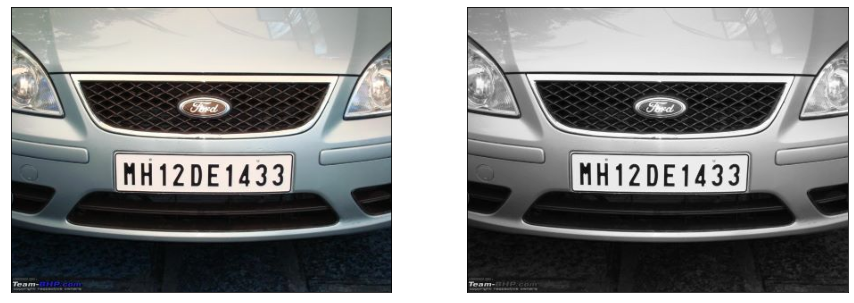

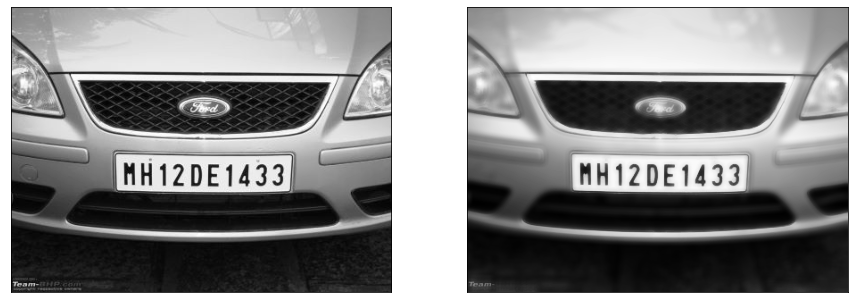

In [ ]:

plot_images(image, gray)
blur = cv2.bilateralFilter(gray, 11,90, 90)
plot_images(gray, blur)

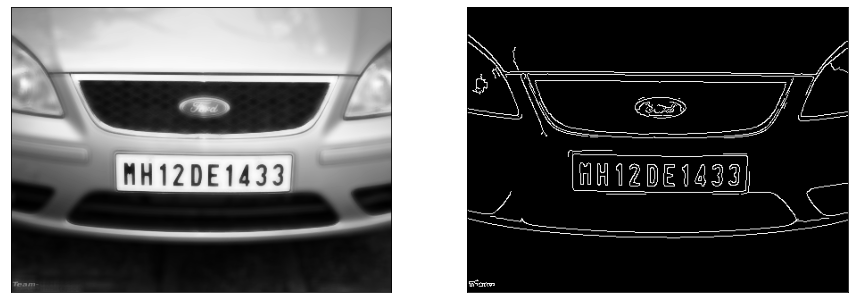

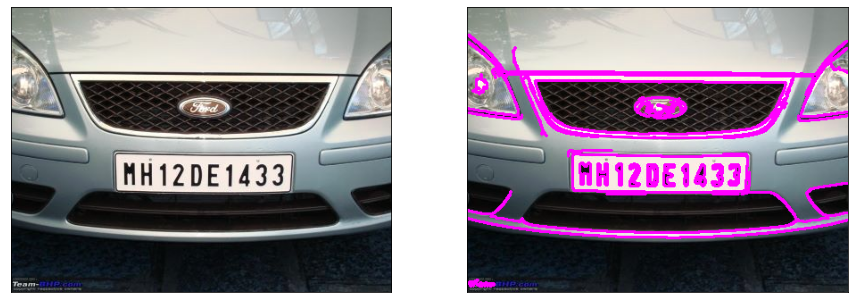

In [ ]:
edges = cv2.Canny(blur, 30, 200)
plot_images(blur, edges)
cnts, new = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
image_copy = image.copy()
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)
plot_images(image, image_copy)

In [ ]:
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:30]

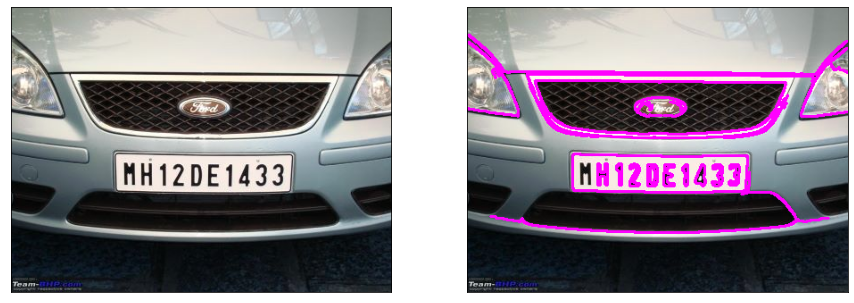

In [ ]:
image_copy = image.copy()
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)
plot_images(image, image_copy)
plate = None
for c in cnts:
    perimeter = cv2.arcLength(c, True)
    edges_count = cv2.approxPolyDP(c, 0.02 * perimeter, True)
    if len(edges_count) == 4:
        x,y,w,h = cv2.boundingRect(c)
        plate = image[y:y+h, x:x+w]
        break

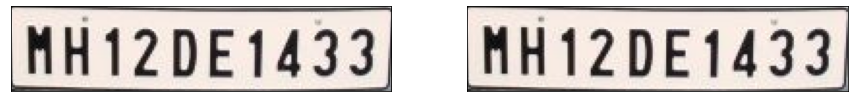

In [ ]:

cv2.imwrite("plate.png",plate)
plot_images(plate, plate)

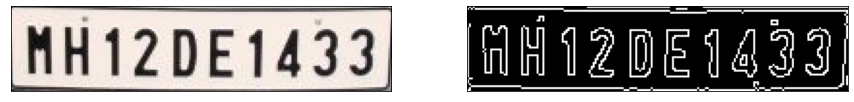

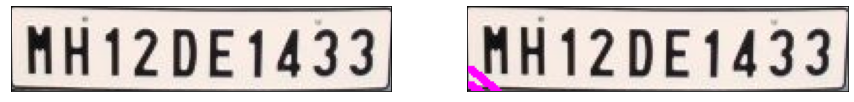

In [ ]:
edges1 = cv2.Canny(plate, 30, 200)
plot_images(plate, edges1)
cnts1, new1 = cv2.findContours(edges1.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
image_copy1 = plate.copy()
_ = cv2.drawContours(image_copy1, cnts, -1, (255,0,255),2)
plot_images(plate, image_copy1)


In [ ]:

!sudo apt install tesseract-ocr
!pip install pytesseract
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 34 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (3,796 kB/s)
debconf: unable to initi

In [ ]:
text = pytesseract.image_to_string(plate, lang="eng")
print(text)

MH12DE1433



In [ ]:
##MODEL

In [ ]:
import os
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.externals import joblib
from skimage.io import imread
from skimage.filters import threshold_otsu


/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
letters = [
            '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D',
            'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T',
            'U', 'V', 'W', 'X', 'Y', 'Z'
        ]


In [ ]:
def read_training_data(training_directory):
    image_data = []
    target_data = []
    for each_letter in letters:
        for each in range(10):
            image_path = os.path.join(training_directory, each_letter, each_letter + '_' + str(each) + '.jpg')
            img_details = imread(image_path, as_gray=True)
            # converts each character image to binary image
            binary_image = img_details < threshold_otsu(img_details)
            flat_bin_image = binary_image.reshape(-1)
            image_data.append(flat_bin_image)
            target_data.append(each_letter)

    return (np.array(image_data), np.array(target_data))


In [ ]:
def cross_validation(model, num_of_fold, train_data, train_label):
   
    accuracy_result = cross_val_score(model, train_data, train_label,
                                      cv=num_of_fold)
    print("Cross Validation Result for ", str(num_of_fold), " -fold")

    print(accuracy_result * 100)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls


drive  sample_data


In [ ]:
training_dataset_dir="drive/MyDrive/data"

In [ ]:
training_dataset_dir =training_dataset_dir+"/train20X20"
print(training_dataset_dir)

drive/MyDrive/data/train20X20


In [ ]:
image_data, target_data = read_training_data(training_dataset_dir)
print('reading data completed')

reading data completed


In [ ]:
svc_model = SVC(kernel='linear', probability=True)

cross_validation(svc_model, 8, image_data, target_data)

print('training model')

svc_model.fit(image_data, target_data)

Cross Validation Result for  8  -fold
[ 95.34883721  95.34883721 100.          97.6744186  100.
  95.23809524 100.         100.        ]
training model


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
import pickle
print("model trained.saving model..")
filename = "drive/MyDrive/data"+"/model.sav"
pickle.dump(svc_model, open(filename, 'wb'))
print("model saved")

model trained.saving model..
model saved


In [ ]:
##plotting

In [ ]:
class plotting():
  import matplotlib.pyplot as plt 
  def gen_plot(nr,nc):
    fig,axis=plt.subplots(nr,nc)
    return fig,axis
    
  def plot_car_image(image,fig,axes):
    axes.imshow(image,cmap="gray")
    

  def add_borders(border,fig,axes):
    axes.add_patch(border)
    
  def show():
    plt.show()

In [ ]:
from skimage.io import imread
from skimage.filters import threshold_otsu
from skimage import measure
from skimage.transform import resize
import matplotlib.patches as patches
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
class Preprocess():
    def __init__(self,image_path):
        self.car_image = imread(image_path, as_gray=True)*255
        threshold_value = threshold_otsu(self.car_image)
        self.binary_car_image = self.car_image > threshold_value
        self.fig,(self.axis,self.axis1)=plotting.gen_plot(2,1)



#LICENSE PLATE DETECTION
    #  heuristics for license plate dimensions
    # height of plate is within [5-20]% of image height and width within [15-60]% of image_width
    # region area >50
    # plate height more than 20% plate_width
    # sum of pixels in plate greater than 60 % of total pixels
    # only 10 cc in actual plate
    

    def plate_detection(self):    
        label_image = measure.label(self.binary_car_image)
        image_height,  image_width=label_image.shape                  
        plate_dim=(0.05*image_height,0.2*image_height,0.15*image_width,0.6*image_width)
        
        plotting.plot_car_image(self.car_image,self.fig,self.axis)

        self.lp_cands=[]
        self.lp_cand_dimension=[]
        for region in measure.regionprops(label_image):
            minRow, minCol, maxRow, maxCol = region.bbox
            (region_height,region_width)=(maxRow-minRow,maxCol-minCol)
            
            if(region.area < 50 or region_height<0.2*region_width ):
                continue
            candidate=np.invert(self.binary_car_image[minRow:maxRow,minCol:maxCol])
            if(region_height>=plate_dim[0] and region_height <=plate_dim[1] and region_width>=plate_dim[2] and region_width<= plate_dim[3]):

                if self.elimininate_candidate(candidate):
                    continue
                
                rectBorder = patches.Rectangle((minCol, minRow), maxCol-minCol, maxRow-minRow, edgecolor="red", linewidth=2, fill=False)
                self.lp_cands.append(candidate)
                self.lp_cand_dimension.append(((minRow,minCol),(maxRow-minRow,maxCol-minCol)))
                plotting.add_borders(rectBorder,self.fig,self.axis) 

    def elimininate_candidate(self,candidate):
        r,c=candidate.shape
        return np.sum(candidate) > 0.3*r*c 


## CHARACTER SEGMENTATION  
##  Heuristics for character
##  character height [35-90]%  and width [2-10]% 

    def character_segmentation(self):
        segmented_characters=[]
        idx=0
        for idx in range(len(self.lp_cands)):
            cand=self.lp_cands[idx]
            plotting.plot_car_image(cand,self.fig,self.axis1)
            char_dim = (0.30*cand.shape[0], 0.90*cand.shape[0], 0.02*cand.shape[1], 0.1*cand.shape[1])
            
            labelled_cand = measure.label(cand)
            cnt=0
            border=[]
            temp_chars=[]
            for region in measure.regionprops(labelled_cand):                         
                minRow, minCol, maxRow, maxCol = region.bbox        
                (region_height,region_width)=(maxRow-minRow,maxCol-minCol)
                if(maxRow==self.lp_cand_dimension[idx][1][0]):
                    continue
                #print(region_height,region_width)
                if(region_height>=char_dim[0] and region_height <=char_dim[1] and region_width>=char_dim[2] and region_width<= char_dim[3]):
                    rectBorder = patches.Rectangle((minCol, minRow), maxCol-minCol, maxRow-minRow, edgecolor="red", linewidth=2, fill=False)
                    border.append(rectBorder)
                    temp_chars.append((minRow,maxRow,minCol,maxCol)) 
                    plotting.add_borders(rectBorder,self.fig,self.axis1)               
            
            
            if(len(border)==10):               
                for borders in border:
                    plotting.add_borders(borders,self.fig,self.axis1)                    
                dim=self.lp_cand_dimension[idx]
                
                for val in temp_chars:
                    r1=dim[0][0]+val[0]
                    r2=dim[0][0]+val[1]
                    c1=dim[0][1]+val[2]
                    c2=dim[0][1]+val[3]
                    segmented_characters.append((val[2],resize(np.invert(self.binary_car_image[r1:r2,c1:c2]),(20,20))))
        return segmented_characters

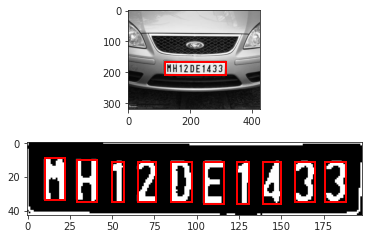

In [ ]:
if __name__=="__main__":
    inp="drive/MyDrive/data/test_image/car4.jpg"
    env=Preprocess(inp)
    env.plate_detection()
    segmented_characters=env.character_segmentation()

    plotting.show()

In [ ]:
##Prediction

In [ ]:

import plotting
import matplotlib.pyplot as plt
import pickle
import os
import sys


In [ ]:
model_pat="drive/MyDrive/data"+"/model.sav"

In [ ]:
model= pickle.load(open(model_pat,"rb"))

In [ ]:

segmented_characters.sort()

In [ ]:
segmented_characters

[(10, array([[2.00000000e-01, 4.00000000e-01, 1.00000000e+00, 4.00000000e-01,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [5.00000000e-01, 6.25000000e-01, 1.00000000e+00, 6.25000000e-01,
          3.75000000e-01, 3.75000000e-01, 2.25000000e-01, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          9.99200722e-16, 2.25000000e-01, 3.75000000e-01, 3.75000000e-01,
          3.75000000e-01, 3.75000000e-01, 1.50000000e-01, 7.50000000e-02],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
          1.00000000e+00, 1.00000000e+00, 6.00000000e-01, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.50000000e-01,
          6.25000000e-01, 8.5000

In [ ]:
ans=[]
for char in segmented_characters:
    #print(plt.imshow(char[1]))
    ans.append(model.predict(char[1].reshape(1,-1)))
license_plate= []
for val in ans:
    license_plate.append(val[0])


for idx in range(len(license_plate)):
    if(idx==0 or idx==1 or idx==4 or idx==5):
        if(license_plate[idx]=='0'):
            license_plate[idx]=str('O')
        elif(license_plate[idx]=='1'):
            license_plate[idx]=str('I')
        elif(license_plate[idx]=='2'):
            license_plate[idx]='Z'
    else:
        if(license_plate[idx]=='O'):
            license_plate[idx]='0'
        elif(license_plate[idx]=='I'):
            license_plate[idx]='1'
        elif(license_plate[idx]=='Z'):
            license_plate[idx]=str('2')
  
license_plate="".join(license_plate)
print("Recognized License Plate is:")
print(license_plate)


Recognized License Plate is:
MH12DE1433
